In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
print(f"Training sample:\n{train_data[0]}\n") 
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

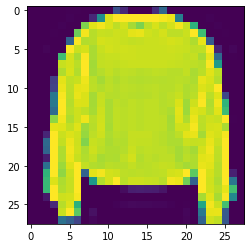

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

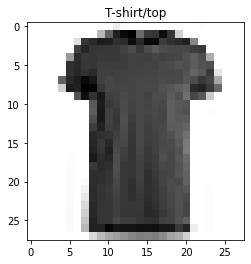

In [ ]:
plt.imshow(train_data[17],cmap=plt.cm.binary)
plt.title(class_names[train_labels[17]])

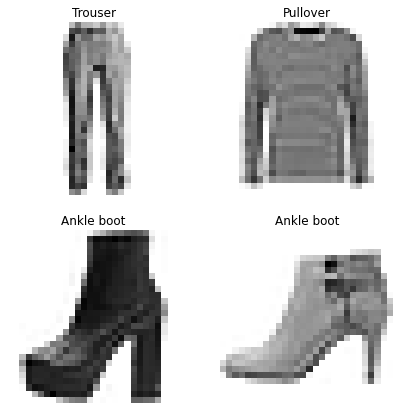

In [ ]:
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax=plt.subplot(2,2,i+1)
  rand_index=random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [ ]:
tf.random.set_seed(42)

In [ ]:

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels)) # see how the model performs on the test set during training

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1748 - accuracy: 0.1593 - val_loss: 1.8085 - val_accuracy: 0.2066
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7104 - accuracy: 0.2488 - val_loss: 1.6617 - val_accuracy: 0.2716
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6373 - accuracy: 0.2818 - val_loss: 1.6144 - val_accuracy: 0.2745
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6065 - accuracy: 0.2903 - val_loss: 1.6052 - val_accuracy: 0.3053
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5979 - accuracy: 0.3047 - val_loss: 1.5769 - val_accuracy: 0.3251
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5840 - accuracy: 0.3143 - val_loss: 1.5722 - val_accuracy: 0.2951
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5780 - accuracy: 0.3214 - val_loss: 1.5686 - val_accuracy:

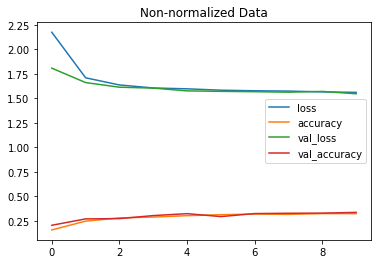

In [ ]:
import pandas as pd
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")


In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3*10**(epoch/20))
find_lr_hisotry=model_13.fit(train_data,train_labels,epochs=40,validation_data=(test_data,test_labels),callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 3s 2ms/step - loss: 2.1772 - accuracy: 0.1591 - val_loss: 1.8051 - val_accuracy: 0.2032
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7093 - accuracy: 0.2504 - val_loss: 1.7714 - val_accuracy: 0.2594
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6349 - accuracy: 0.2852 - val_loss: 1.6075 - val_accuracy: 0.2781
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6092 - accuracy: 0.2971 - val_loss: 1.5848 - val_accuracy: 0.3174
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5997 - accuracy: 0.3091 - val_loss: 1.6119 - val_accuracy: 0.3047
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6053 - accuracy: 0.3104 - val_loss: 1.5628 - val_accuracy: 0.3324
Epoch 7/40
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5980 - accuracy: 0.3137 - val_loss: 1.5777 - val_accuracy:

Text(0.5, 1.0, 'Finding the ideal lr')

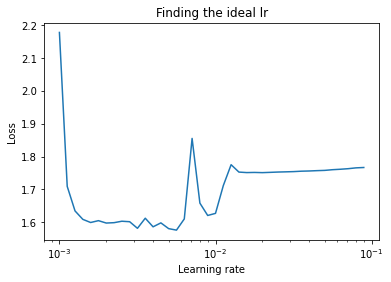

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
lrs=1e-3*(10**(np.arange(40)/20))
plt.semilogx(lrs,find_lr_hisotry.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal lr")

In [ ]:
np.arange(40)

In [ ]:
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history = model_14.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1770 - accuracy: 0.1592 - val_loss: 1.8113 - val_accuracy: 0.2045
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7095 - accuracy: 0.2478 - val_loss: 1.6637 - val_accuracy: 0.2757
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6369 - accuracy: 0.2788 - val_loss: 1.6113 - val_accuracy: 0.2744
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6119 - accuracy: 0.2791 - val_loss: 1.6129 - val_accuracy: 0.2826
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6051 - accuracy: 0.2885 - val_loss: 1.5829 - val_accuracy: 0.3130
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5905 - accuracy: 0.3037 - val_loss: 1.5940 - val_accuracy: 0.2855
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5825 - accuracy: 0.3121 - val_loss: 1.5647 - val_accuracy:

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix

In [ ]:
def make_confusion_matrix(y_true,y_pred,classes=None,figsize=(10,10),text_size=15):
  cm=confusion_matrix(y_true,y_pred)
  cm_norm=cm.astype("float")/cm.sum(axis=1)[:,np.newaxis]
  n_classes=cm.shape[0]
  fig,ax=plt.subplots(figsize=figsize)
  cax=ax.matshow(cm,cmap=plt.cm.Blues)
  fig.colorbar(cax)
  if classes:
    labels=classes
  else:
    labels=np.arange(cm.shape[0])
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()
  threshold = (cm.max() + cm.min()) / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [ ]:
y_probs = model_14.predict(test_data) # "probs" is short for probabilities

# View the first 5 predictions
y_probs[:5]


array([[2.0715930e-08, 3.1524846e-29, 0.0000000e+00, 1.8679563e-14,
        4.8832664e-19, 5.4601002e-03, 4.3336879e-10, 6.3125110e-01,
        6.0913619e-05, 3.6322784e-01],
       [1.4550617e-01, 1.4363605e-01, 1.4153218e-01, 1.4238845e-01,
        1.3886280e-01, 4.8733451e-03, 1.3952848e-01, 3.8118180e-04,
        1.4327398e-01, 1.7377180e-05],
       [1.4550617e-01, 1.4363605e-01, 1.4153218e-01, 1.4238845e-01,
        1.3886280e-01, 4.8733451e-03, 1.3952848e-01, 3.8118180e-04,
        1.4327398e-01, 1.7377180e-05],
       [1.4550617e-01, 1.4363605e-01, 1.4153218e-01, 1.4238845e-01,
        1.3886280e-01, 4.8733451e-03, 1.3952848e-01, 3.8118180e-04,
        1.4327398e-01, 1.7377180e-05],
       [1.4550617e-01, 1.4363605e-01, 1.4153218e-01, 1.4238845e-01,
        1.3886280e-01, 4.8733451e-03, 1.3952848e-01, 3.8118180e-04,
        1.4327398e-01, 1.7377180e-05]], dtype=float32)

In [ ]:
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(7, 'Sneaker')

In [ ]:
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([7, 0, 0, 0, 0, 0, 0, 0, 5, 7])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, 
                 y_pred=y_preds)


array([[1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [ 999,    0,    0,    0,    0,    1,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [ 993,    0,    0,    0,    0,    7,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [  24,    0,    0,    0,    0,  676,    0,  282,    0,   18],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   1,    0,    0,    0,    0,   51,    0,  825,    0,  123],
       [ 981,    0,    0,    0,    0,   14,    0,    2,    0,    3],
       [   1,    0,    0,    0,    0,    3,    0,  111,    0,  885]])

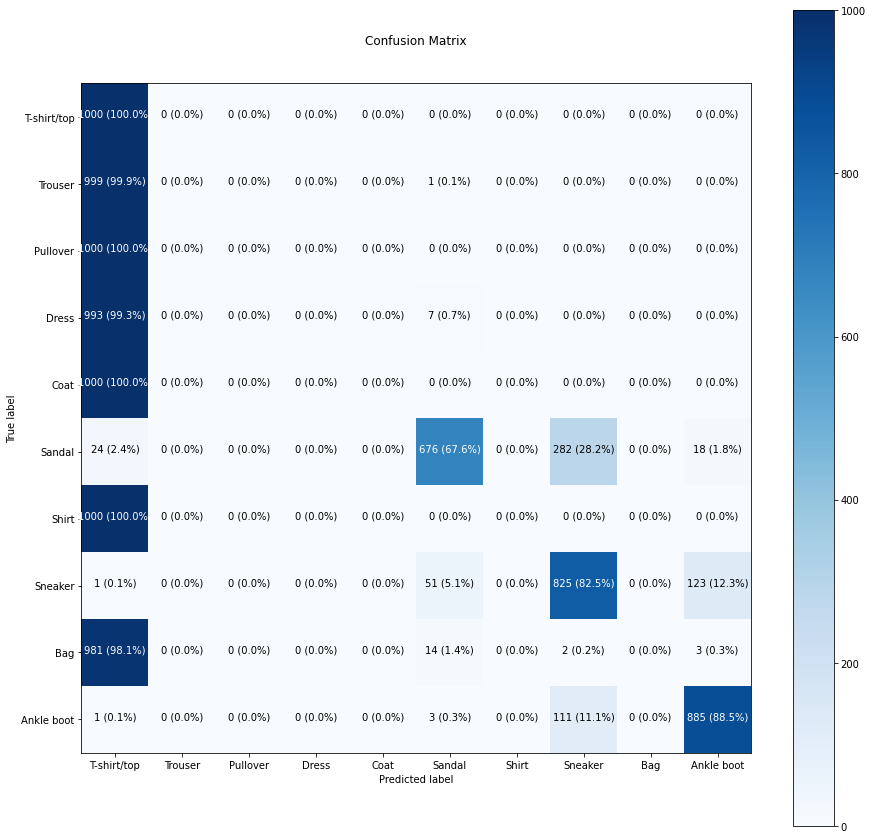

In [ ]:
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),text_size=10)

In [ ]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

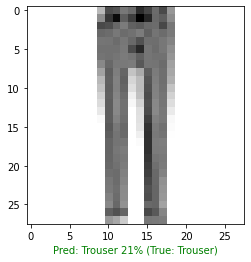

In [ ]:
plot_random_image(model=model_13, 
                  images=test_data, 
                  true_labels=test_labels, 
                  classes=class_names)

In [ ]:
model_14.layers

In [ ]:
weights,biases=model_14.layers[1].get_weights()
weights,weights.shape

(array([[ 0.0287192 , -0.01029544, -0.02567479, -0.00619847],
        [-0.08138508,  0.03222882,  0.97027135,  0.06499861],
        [-0.07758083, -0.04830738,  0.85467803,  0.0388018 ],
        ...,
        [ 0.01556861,  0.01661945, -0.14238998, -0.02348963],
        [ 0.01095042,  0.02673633, -0.06845798, -0.07461146],
        [-0.00482979,  0.027058  ,  0.12397201, -0.05812328]],
       dtype=float32), (784, 4))

In [ ]:
biases, biases.shape

(array([-0.0452886 , -0.04273837,  1.1726661 , -0.0418404 ], dtype=float32),
 (4,))

In [ ]:
model_14.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 3140      
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_8 (Dense)              (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


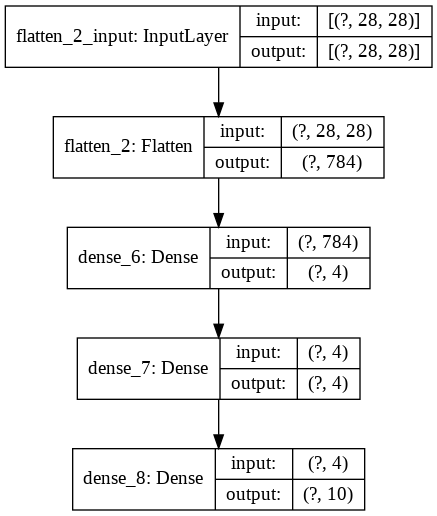

In [ ]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)